In [1]:
# Define important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv("creditcard.csv")

In [3]:
# Visualization of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Get the shape of the data
df.shape

(284807, 31)

In [5]:
# Get all the details of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
# Check the null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Check the Data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# Get features information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Check the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Count unique values in all columns

for item in df.columns:
    print(item, ": " )
    print(df[item].unique())
    print(df[item].value_counts())
    print("************************************************")

Time : 
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64
************************************************
V1 : 
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
 2.055797    77
 1.245674    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.938907     1
 1.375417     1
-3.762431     1
 1.420284     1
-0.533413     1
Name: V1, Length: 275663, dtype: int64
************************************************
V2 : 
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
-0.326668    77
 0.166975    77
 0.089735    62
-0.606529    60
-0.146975    53
             ..
 0.432811     1
-0.504471     1
-1.210369     1
-0.395470     1
-0.189733     1
Name: V2, Length: 275663, dtype: int64
*********

In [11]:
# List columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: >

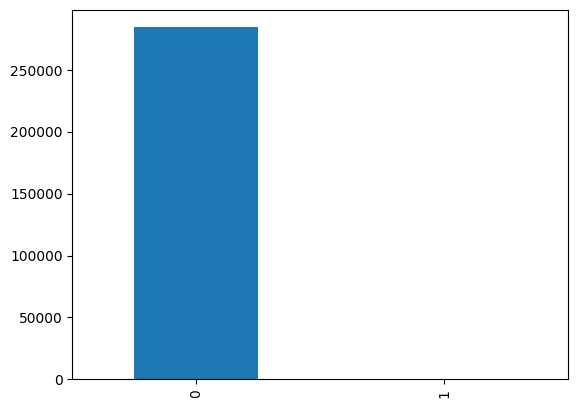

In [12]:
# Plot the value counts of the "class" feature
df.Class.value_counts().plot.bar()

In [13]:
# Show the value counts of the "class" feature
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Fully Connected Neural Network (FCN)

In [14]:
# Get i/p and o/p of the model
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 492})


In [16]:
# transform the dataset
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_r, y_r = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y_r)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_r == label)[0]

Counter({0: 284315, 1: 284315})


In [17]:
from sklearn.preprocessing import StandardScaler

## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [18]:
# Splitting in to Train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_r2, y_r, test_size = 0.2, random_state = 0)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(454904, 30) (113726, 30) (454904,) (113726,)


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Required modules in ANN model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [22]:
# Initialize the ANN
model = Sequential()

In [23]:
# Add the input layer and first Hidden Layer
model.add(Dense(activation = "relu", input_dim = 30, units = 6, kernel_initializer='uniform' ))

# Add the Second hidden layer
model.add(Dense(activation = "relu", units =20, kernel_initializer='uniform'))

# Add the third hidden layer
model.add(Dense(activation = "relu", units = 10, kernel_initializer='uniform'))

# Add the output Layer
model.add(Dense(activation = 'sigmoid', units =1, kernel_initializer='uniform',))

In [24]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 186       
                                                                 
 dense_1 (Dense)             (None, 20)                140       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [25]:
# compile the model
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [26]:
# Fit the model to the training set
history1 = model.fit(X_train, y_train, batch_size = 1000, epochs =10, validation_data=(X_test, y_test))

Epoch 1/10
455/455 [==============================] - 6s 7ms/step - loss: 0.2525 - accuracy: 0.9259 - val_loss: 0.0796 - val_accuracy: 0.9716
Epoch 2/10
455/455 [==============================] - 3s 6ms/step - loss: 0.0700 - accuracy: 0.9753 - val_loss: 0.0639 - val_accuracy: 0.9779
Epoch 3/10
455/455 [==============================] - 2s 5ms/step - loss: 0.0603 - accuracy: 0.9786 - val_loss: 0.0577 - val_accuracy: 0.9793
Epoch 4/10
455/455 [==============================] - 2s 5ms/step - loss: 0.0559 - accuracy: 0.9801 - val_loss: 0.0544 - val_accuracy: 0.9802
Epoch 5/10
455/455 [==============================] - 2s 4ms/step - loss: 0.0531 - accuracy: 0.9811 - val_loss: 0.0519 - val_accuracy: 0.9808
Epoch 6/10
455/455 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9820 - val_loss: 0.0497 - val_accuracy: 0.9819
Epoch 7/10
455/455 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9826 - val_loss: 0.0488 - val_accuracy: 0.9820
Epoch 

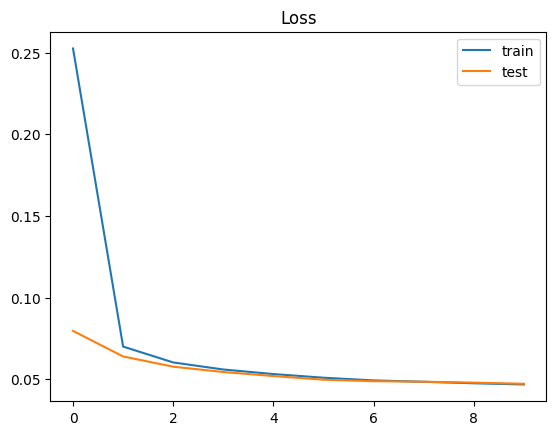

In [27]:
# Plot loss during training and testing

pyplot.title('Loss')
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

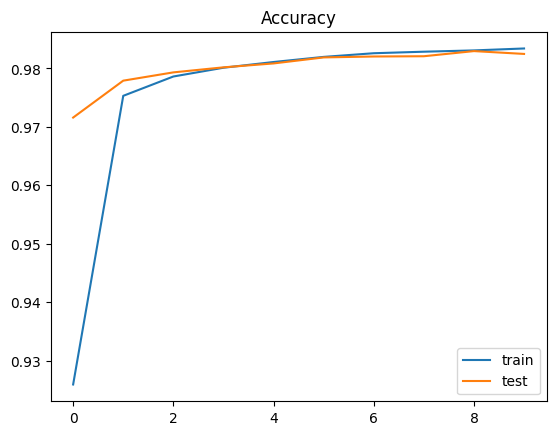

In [28]:
# Plot accuracy during training and testing

pyplot.title('Accuracy')
pyplot.plot(history1.history['accuracy'], label='train')
pyplot.plot(history1.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
# Make the Prediction and Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

3554/3554 [==============================] - 8s 2ms/step


In [30]:
# Check the accuracy and other scores
from sklearn.metrics import confusion_matrix, precision_score, recall_score

print("Accuracy Score   : ", accuracy_score(y_test, y_pred))
print("Precision Score  : ", precision_score(y_test, y_pred))
print("Recall Score     : ", recall_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_pred, y_test))

Accuracy Score   :  0.982466630322002
Precision Score  :  0.9916696460493386
Recall Score     :  0.9731939230202449
Confusion Matrix : 
 [[56258  1528]
 [  466 55474]]


In [31]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56724
           1       0.99      0.97      0.98     57002

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



## Recurrent Neural Networks (RNN)

In [32]:
# Import required libraries

import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [33]:
# Read the data from dataset
data = pd.read_csv("creditcard.csv")
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [34]:
# Remove unnecessary features
tr_data = data.drop(col_del,axis =1)
tr_data

,V1,V2,V3,V4,V10,V11,V12,V14,V17,Class
0,-1.359807,-0.072781,2.536347,1.378155,0.090794,-0.551600,-0.617801,-0.311169,0.207971,0
1,1.191857,0.266151,0.166480,0.448154,-0.166974,1.612727,1.065235,-0.143772,-0.114805,0
2,-1.358354,-1.340163,1.773209,0.379780,0.207643,0.624501,0.066084,-0.165946,1.109969,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.054952,-0.226487,0.178228,-0.287924,-0.684093,0
4,-1.158233,0.877737,1.548718,0.403034,0.753074,-0.822843,0.538196,-1.119670,-0.237033,0
...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,4.356170,-1.593105,2.711941,4.626942,1.991691,0
284803,-0.732789,-0.055080,2.035030,-0.738589,-0.975926,-0.150189,0.915802,-0.675143,-0.025693,0
284804,1.919565,-0.301254,-3.249640,-0.557828,-0.484782,0.411614,0.063119,-0.510602,0.313502,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.399126,-1.933849,-0.962886,0.449624,0.509928,0


In [35]:
# Set X and y for model training
X = tr_data.drop(['Class'], axis = 'columns')
y = tr_data['Class']

In [36]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 492})


In [37]:
# transform the dataset
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_r, y_r = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y_r)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_r == label)[0]

Counter({0: 284315, 1: 284315})


In [38]:
from sklearn.preprocessing import StandardScaler

## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [39]:
# Train the model
X_train,X_test,y_train,y_test = train_test_split(X_r2, y_r, test_size=0.2)

In [40]:
# Shape the trained X
X_train.shape

(454904, 9)

In [41]:
# Shape the tested X
X_test.shape

(113726, 9)

In [42]:
# Design network
np.random.seed(7)

train_LSTM_X=X_train
val_LSTM_X=X_test

# Reshape input
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

# Recuperation the labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [43]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [44]:
inputs1=Input((1,9))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model2=Model(inputs1,outputs1)

In [45]:
# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Fit the model
history2 = model2.fit(train_LSTM_X, train_LSTM_y,epochs=20,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/20
23/23 [==============================] - 28s 554ms/step - loss: 0.6668 - accuracy: 0.8360 - val_loss: 0.6242 - val_accuracy: 0.8852
Epoch 2/20
23/23 [==============================] - 11s 462ms/step - loss: 0.5669 - accuracy: 0.8786 - val_loss: 0.4803 - val_accuracy: 0.8862
Epoch 3/20
23/23 [==============================] - 11s 469ms/step - loss: 0.4222 - accuracy: 0.8826 - val_loss: 0.3480 - val_accuracy: 0.8944
Epoch 4/20
23/23 [==============================] - 11s 468ms/step - loss: 0.3215 - accuracy: 0.8960 - val_loss: 0.2771 - val_accuracy: 0.9075
Epoch 5/20
23/23 [==============================] - 11s 464ms/step - loss: 0.2730 - accuracy: 0.9063 - val_loss: 0.2413 - val_accuracy: 0.9111
Epoch 6/20
23/23 [==============================] - 5s 231ms/step - loss: 0.2474 - accuracy: 0.9117 - val_loss: 0.2177 - val_accuracy: 0.9137
Epoch 7/20
23/23 [==============================] - 5s 230ms/step - loss: 0.2321 - accuracy: 0.9151 - val_loss: 0.2022 - val_accuracy: 0.9263
E

In [47]:
# Evaluate the model
_, train_acc = model2.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model2.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.93533, Test: 0.93577


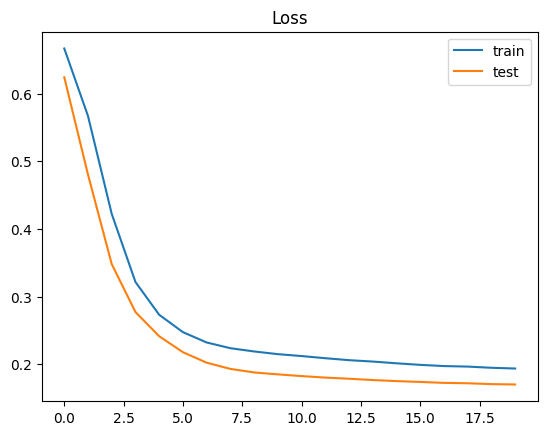

In [48]:
# Plot loss during training and testing

pyplot.title('Loss')
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

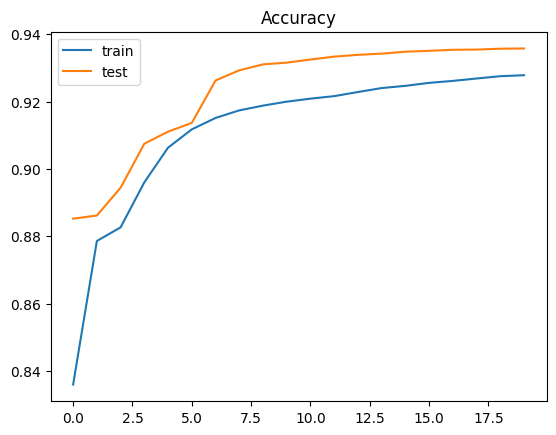

In [49]:
# Plot accuracy during training and testing

pyplot.title('Accuracy')
pyplot.plot(history2.history['accuracy'], label='train')
pyplot.plot(history2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [50]:
# Predict probabilities for test set
yhat_probs = model2.predict(val_LSTM_X , verbose=0)

# Reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [51]:
# Demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, np.round(abs(yhat_probs)))
print('Accuracy: ',accuracy)

# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, np.round(abs(yhat_probs)))
print('Precision: ',precision)

# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, np.round(abs(yhat_probs)))
print('Recall :',recall)

# Confusion Matrix
cm = confusion_matrix(val_LSTM_y, np.round(abs(yhat_probs)))
print('Confusion Matrix: \n', cm)

Accuracy:  0.9357666672528709
Precision:  0.9889844754276673
Recall : 0.8811050814010853
Confusion Matrix: 
 [[56413   557]
 [ 6748 50008]]


In [52]:
# Classification Report
print("Classification Report:\n", classification_report(val_LSTM_y, np.round(abs(yhat_probs))))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     56970
           1       0.99      0.88      0.93     56756

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



## TabNet - Deep Neural Network for Tabular Data

In [54]:
# Define needed modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report

In [55]:
# Set X and y
X = data.drop('Class', axis=1)
y = data['Class']

In [56]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 492})


In [57]:
# transform the dataset
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_r, y_r = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y_r)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_r == label)[0]

Counter({0: 284315, 1: 284315})


In [58]:
from sklearn.preprocessing import StandardScaler

## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [59]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_r2, y_r, test_size=0.2, random_state=42, stratify=y_r)

In [60]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Initialize TabNetClassifier
clf = TabNetClassifier()
history3 = clf.fit( X_train_scaled, y_train,
                    eval_set=[(X_test_scaled, y_test)],
                    eval_metric=['accuracy'],
                    max_epochs=2,
                    patience=10,
                    batch_size=1000,
                    virtual_batch_size=256,
                    num_workers=0,
                    drop_last=False
                )

c:\Users\JAYDIP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.07903 | val_0_accuracy: 0.98638 |  0:00:25s
epoch 1  | loss: 0.03335 | val_0_accuracy: 0.99362 |  0:00:53s
Stop training because you reached max_epochs = 2 with best_epoch = 1 and best_val_0_accuracy = 0.99362


c:\Users\JAYDIP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [62]:
# Make the predictions
y_pred = clf.predict(X_test_scaled)

In [63]:
# Check the accuracy and other scores
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print("Accuracy Score   : ", accuracy_score(y_test, y_pred))
print("Precision Score  : ", precision_score(y_test, y_pred))
print("Recall Score     : ", recall_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_pred, y_test))

Accuracy Score   :  0.993616235513427
Precision Score  :  0.9916104737717839
Recall Score     :  0.9956562263686404
Confusion Matrix : 
 [[56384   247]
 [  479 56616]]


In [64]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.99      1.00      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

